# Getting started with [warfit-learn](https://github.com/gianlucatruda/warfit-learn)

A toolkit for reproducible research in warfarin dose estimation.

In [0]:
%matplotlib inline

First we will install warfit-learn from PyPi using `pip`, then import a few basic supporting libaries.

In [0]:
pip install warfit-learn

In [0]:
import sklearn
import pandas as pd
import numpy as np

## Loading and preparing the IWPC dataset

In [26]:
from warfit_learn import datasets, preprocessing

raw_iwpc = datasets.load_iwpc()
data = preprocessing.prepare_iwpc(raw_iwpc)
data.shape

(5741, 32)

## Creating models

First, we import two regression estimators from [scikit-learn](https://github.com/gianlucatruda/warfit-learn), which is fully supported by warfit-learn.

We then instantiate a list of these estimators and give them descriptive labels of our choosing:

1.   `LR` for linear regression
2.   `SVR` for support vector regression

We can configure the estimators however we like and warfit-learn will execute them as instantiated. For instance, we may want to specify that the SVR estimator should use an `epsilon_insensitive` loss function.



In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR

from warfit_learn.estimators import Estimator

my_models = [
    Estimator(LinearRegression(), 'LR'),
    Estimator(LinearSVR(loss='epsilon_insensitive'), 'SVR'),
]

# Evaluating models

We will now evaluate our collection of models (estimators) using the `evaluate_esimators()` function from `warfit_learn.evaluation`. 

We provide it with the list of our estimators and the cleaned and formatted IWPC dataset from earlier. 

By specifying `parallelism=0.5` we are using 50% of our CPU capacity. We have set `resamples=10` so that each of our estimators is evaluated 10 times. 

In [33]:
from warfit_learn.evaluation import evaluate_estimators

results = evaluate_estimators(
    my_models,
    data,
    parallelism=0.5,
    resamples=10,
)

Using 1 / 2 CPU cores...

LR...
   PW20      MAE        R2
-------  -------  --------
45.4047  8.70827  0.436191

SVR...
   PW20      MAE        R2
-------  -------  --------
45.6049  8.76897  0.448331


                PW20       MAE        R2
Estimator                               
LR         45.404700  8.708271  0.436191
SVR        45.604874  8.768972  0.448331



As expected we now have a dataframe of results for each of the 20 trials we ran.

Note that the data is shuffled and split into training- and validation- sets for each trial, so we get different results each time. 

In [34]:
results

,Estimator,PW20,MAE,R2
0,LR,46.040035,8.608396,0.433467
1,LR,44.647520,8.746329,0.435183
2,LR,44.473455,8.687267,0.401249
3,LR,48.389904,8.426658,0.496300
4,LR,44.386423,8.559872,0.466298
5,LR,46.040035,8.870254,0.389101
6,LR,43.951262,9.019582,0.437109
7,LR,45.169713,8.587634,0.439606
8,LR,46.301131,8.844159,0.463413
9,LR,44.647520,8.732555,0.400180


We can summarise these results easily by grouping them on the `Estimator` column and specifying that we want them to be aggregated by `mean` value. We could also specify the `max` or `min` value, or apply any other function of our choice.

In [35]:
summary = results.groupby('Estimator').apply(np.mean)
summary

,PW20,MAE,R2
Estimator,,,
LR,45.404700,8.708271,0.436191
SVR,45.604874,8.768972,0.448331


Becuase of warfit-learn's seamless integration with the Python scientific stack, Pandas, and scikit-learn, producing plots of our results is easy.

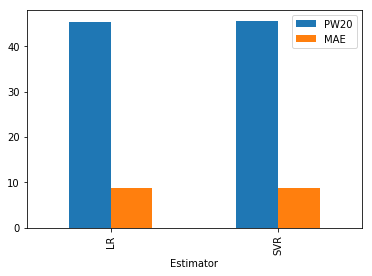

In [36]:
summary[['PW20', 'MAE']].plot(kind='bar')

**Copyright (C) 2019 Gianluca Truda**

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.